In [1]:
#For Google Colab. connect to Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import sys
# !{sys.executable} -m pip install pandas
# !pip3 install pandas
# !pip3 install scikit-learn
# !pip3 install matplotlib

In [3]:
import pandas as pd
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Library configuration
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Set output options
pd.set_option('display.max_columns', 3000)
pd.options.display.max_rows = 999

In [4]:
def split_generator(df):
  cv=[]
  df['prediction_date'] = pd.to_datetime(df['prediction_date'], errors='coerce')
  groups = df.groupby(df['prediction_date'].dt.to_period("M")).groups
  split_groups = [value for (key, value) in groups.items()] 

  print('spilt number:' + str(len(split_groups)))
  for i in range(len(split_groups)):
    data_index=[]
    for j in range(len(split_groups)):
      if i != j:
        data_index.extend(split_groups[j].tolist())
    cv.append((data_index, split_groups[i].tolist()))
    # yield data_index, split_groups[i].tolist()
  
  return cv

In [5]:
aapl = pd.read_csv('data/preprocessed/Aapl_NewsPriceHistDirection.csv')
print('AAPL:')
aapl.shape
aapl.head()

#group by year-month
aapl_cv=split_generator(aapl)
# aapl_cv=12

amzn = pd.read_csv('data/preprocessed/Amzn_NewsPriceHistDirection.csv')
print('AMZN:')
amzn.shape
amzn.head()

#group by year-month
amzn_cv=split_generator(amzn)
# amzn_cv=12

AAPL:


(69622, 55)

,uuid,author,url,title,language,text,published,title_aapl,text_aapl,title_amzn,text_amzn,title_posSent,title_neg_sent,title_net_sent,text_pos_sent,text_neg_sent,text_net_sent,entity_pos_sent,entity_neg_sent,entity_net_sent,title_entities,text_entities,prediction_date,open,high,low,close,volume,direction,pct_chng,prevClose_1,prevClose_2,prevClose_3,prevClose_4,prevClose_5,prevClose_6,prevClose_7,prevClose_8,prevClose_9,prevClose_10,prevClose_11,prevClose_12,prevClose_13,prevClose_14,prevClose_15,prevClose_16,prevClose_17,prevClose_18,prevClose_19,prevClose_20,prevClose_21,prevClose_22,prevClose_23,prevClose_24,prevClose_25
0,3f884eef1ee888c2053c8eed3dda913e54a568f9,admin,http://www.wallstreetreporter.com/2018/09/the-...,The evidence is mounting that Apple&apos;s nex...,english,"September 2, 2018 admin Trading Ideas Comments...",2018-09-02 12:00:00+00:00,True,True,False,False,0.292428,0.009908,0.697664,0.041162,0.033188,0.925649,0.096885,0.029284,0.873831,"[{'entity_group': 'ORG', 'score': 0.86504984, ...","[{'entity_group': 'MISC', 'score': 0.8753462, ...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
1,4bb3cfd0aaf0ffd7c843695d28a6c7f97c005f0a,Jon Swartz,https://www.barrons.com/articles/regulation-is...,"Regulation Is the Risk as Facebook, Twitter, H...",english,"Sheryl Sandberg, chief operating officer of Fa...",2018-08-31 18:33:00+00:00,False,True,False,False,0.038350,0.353034,0.608616,0.034434,0.238836,0.726730,0.037567,0.514139,0.448294,"[{'entity_group': 'MISC', 'score': 0.934303, '...","[{'entity_group': 'PER', 'score': 0.998726, 'w...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
2,0568ab64d8949b6aca4db001b1d3362d0721a618,PATRICK SEITZ,https://www.investors.com/news/technology/clic...,Apple Stock Gets Price-Target Hikes Ahead Of N...,english,With Apple stock trading near its all-time hig...,2018-09-04 00:00:00+00:00,True,True,False,False,0.538069,0.373904,0.088027,0.251128,0.019059,0.729814,0.608991,0.071097,0.319912,"[{'entity_group': 'ORG', 'score': 0.9655371, '...","[{'entity_group': 'ORG', 'score': 0.7043, 'wor...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
3,21c864caa4c53bffae9b4674eebe93d99bed9ceb,NaN,https://www.barrons.com/articles/stocks-rise-a...,"Stocks Rise, as Trade and Tech Remain Familiar...",english,President Trump was reported to be in favor of...,2018-09-01 02:55:00+00:00,False,True,False,True,0.233226,0.399302,0.367471,0.135174,0.062387,0.802438,0.701790,0.033941,0.264270,"[{'entity_group': 'MISC', 'score': 0.480398, '...","[{'entity_group': 'PER', 'score': 0.98648983, ...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195.64,189.98
4,aad9eb49815cbf6f6a85c1167868ef29f5649c5f,"Ashraf Eassa, The Motley Fool",https://sg.finance.yahoo.com/news/tim-cook-hel...,How Tim Cook Has Helped Make Apple Shareholder...,english,Tim Cook became Apple 's (NASDAQ: AAPL) CEO on...,2018-09-01 06:05:00+00:00,True,True,False,False,0.214392,0.011442,0.774166,0.522637,0.050985,0.426378,0.343107,0.106315,0.550579,"[{'entity_group': 'PER', 'score': 0.99408, 'wo...","[{'entity_group': 'PER', 'score': 0.9985752, '...",2018-09-04,227.9,229.17,226.6,228.36,61218,1,0.201436,227.52,225.02,223.22,219.78,217.92,216.17,215.5,215.0,214.27,215.22,217.64,212.77,210.39,209.75,208.92,207.51,208.78,206.92,207.09,208.99,207.98,207.42,201.64,195

spilt number:15
AMZN:


(19079, 55)

,uuid,author,url,title,language,text,published,title_aapl,text_aapl,title_amzn,text_amzn,title_posSent,title_neg_sent,title_net_sent,text_pos_sent,text_neg_sent,text_net_sent,entity_pos_sent,entity_neg_sent,entity_net_sent,title_entities,text_entities,prediction_date,open,high,low,close,volume,direction,pct_chng,prevClose_1,prevClose_2,prevClose_3,prevClose_4,prevClose_5,prevClose_6,prevClose_7,prevClose_8,prevClose_9,prevClose_10,prevClose_11,prevClose_12,prevClose_13,prevClose_14,prevClose_15,prevClose_16,prevClose_17,prevClose_18,prevClose_19,prevClose_20,prevClose_21,prevClose_22,prevClose_23,prevClose_24,prevClose_25
0,3b7327f6858be72e780b02b863d941fe7ce81eab,NaN,https://money.cnn.com/2018/09/05/investing/pre...,6 things to know before the opening bell,english,Click chart for more in-depth data. 1. Big Tec...,2018-09-05 05:12:00+00:00,False,True,False,True,0.060998,0.040879,0.898123,0.029282,0.568029,0.402689,0.282342,0.013111,0.704547,"[{'entity_group': 'MISC', 'score': 0.8700097, ...","[{'entity_group': 'MISC', 'score': 0.96541995,...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
1,8a3015a274df99d231fcf7ff3eb38e2660a984ff,Michael Wiggins De Oliveira,https://seekingalpha.com/article/4203857-netfl...,"Netflix And The Competition - Netflix, Inc. (N...",english,Investment Thesis Netflix ( NFLX ) is a remark...,2018-09-04 15:00:00+00:00,False,True,False,True,0.031161,0.021816,0.947023,0.072877,0.028435,0.898688,0.325566,0.064595,0.609839,"[{'entity_group': 'ORG', 'score': 0.99179953, ...","[{'entity_group': 'MISC', 'score': 0.988969, '...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
2,df5883d078ebfbe015e1e717002e4b889647dbee,Larry Ramer,https://investorplace.com/2018/09/pandora-stoc...,Pandora Stock Gets a Boost — Buy Now,english,MannKind Surges More Than 50% >>> READ MORE\nB...,2018-09-04 16:22:00+00:00,False,True,False,True,0.602235,0.020212,0.377553,0.152033,0.019961,0.828006,0.464281,0.018634,0.517085,"[{'entity_group': 'MISC', 'score': 0.9902256, ...","[{'entity_group': 'MISC', 'score': 0.9231871, ...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
3,861c19bff56d09f97b6798f5fbe374061e8aa55b,morningstar.com,http://news.morningstar.com/all/dow-jones/us-m...,MARKET SNAPSHOT: Tech Tumble Weighs On Stocks;...,english,"By Mark DeCambre, MarketWatch , Ryan Vlastelic...",2018-09-05 00:00:00+00:00,False,True,False,True,0.149068,0.775664,0.075268,0.011017,0.919701,0.069282,0.025404,0.937170,0.037426,"[{'entity_group': 'MISC', 'score': 0.98928815,...","[{'entity_group': 'PER', 'score': 0.99841535, ...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.83,1905.38,1901.75,1903.5,1870.49,1875.73,1881.13,1887.35,1883.33,1919.65,1896.99,1885.99,1896.0,1882.98,1861.48,1847.11,1822.94,1833.98,1796.14,1787.38
4,cb960bebc2bf78d327026127c9fe919a4159e80d,morningstar.com,http://news.morningstar.com/all/benzinga/BenzB...,"New Month, Same Old Story: Trade Fears Persist...",english,"It may be a new month, but the same trade conc...",2018-09-05 00:00:00+00:00,False,True,False,True,0.012341,0.952132,0.035526,0.118360,0.425631,0.456009,0.064799,0.573251,0.361949,"[{'entity_group': 'MISC', 'score': 0.9838889, ...","[{'entity_group': 'ORG', 'score': 0.6127569, '...",2018-09-05,2035.98,2040.61,1989.76,1997.0,41171,-1,-1.951928,2038.05,2013.56,2003.01,1998.5,1931.83,1928.8

spilt number:15


In [6]:
def svm_cv(df, stock, desc, features, label, cv, kernal='rbf', print_summary=False, print_box_plot=False):
    X = df[features]
    y = df[label]
    model = SVC(kernel=kernal)

    results = pd.DataFrame(
        cross_validate(model, X, y, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1']))

    if print_box_plot:
        results.drop('fit_time', axis=1).plot.box(figsize=(10, 5))

    summary = results.describe()
    if print_summary:
        print(summary.loc['mean', :])

    summary = summary.loc['mean', :]
    summary['stock'] = stock
    summary['desc'] = desc
    return summary

What sentiment score are the best at predicting direction

How many days of closing price should be included?

In [7]:
prevClose = [
    'prevClose_1',
    'prevClose_2',
    'prevClose_3',
    'prevClose_4',
    'prevClose_5',
    'prevClose_6',
    'prevClose_7',
    'prevClose_8',
    'prevClose_9',
    'prevClose_10',
    'prevClose_11',
    'prevClose_12',
    'prevClose_13',
    'prevClose_14',
    'prevClose_15',
    'prevClose_16',
    'prevClose_17',
    'prevClose_18',
    'prevClose_19',
    'prevClose_20',
    'prevClose_21',
    'prevClose_22',
    'prevClose_23',
    'prevClose_24',
    'prevClose_25'
]
label = 'direction'

aapl_prevClose_accuracies = []
amzn_prevClose_accuracies = []
for i in range(len(prevClose)):
    precClose_feat = prevClose[0:i+1]
    aapl_prevClose_accuracies.append(svm_cv(aapl, 'AAPL', f'{i+1} days close price', precClose_feat, label, aapl_cv)['test_accuracy'])
    amzn_prevClose_accuracies.append(svm_cv(amzn, 'AMZN', f'{i+1} days close price', precClose_feat, label, amzn_cv)['test_accuracy'])

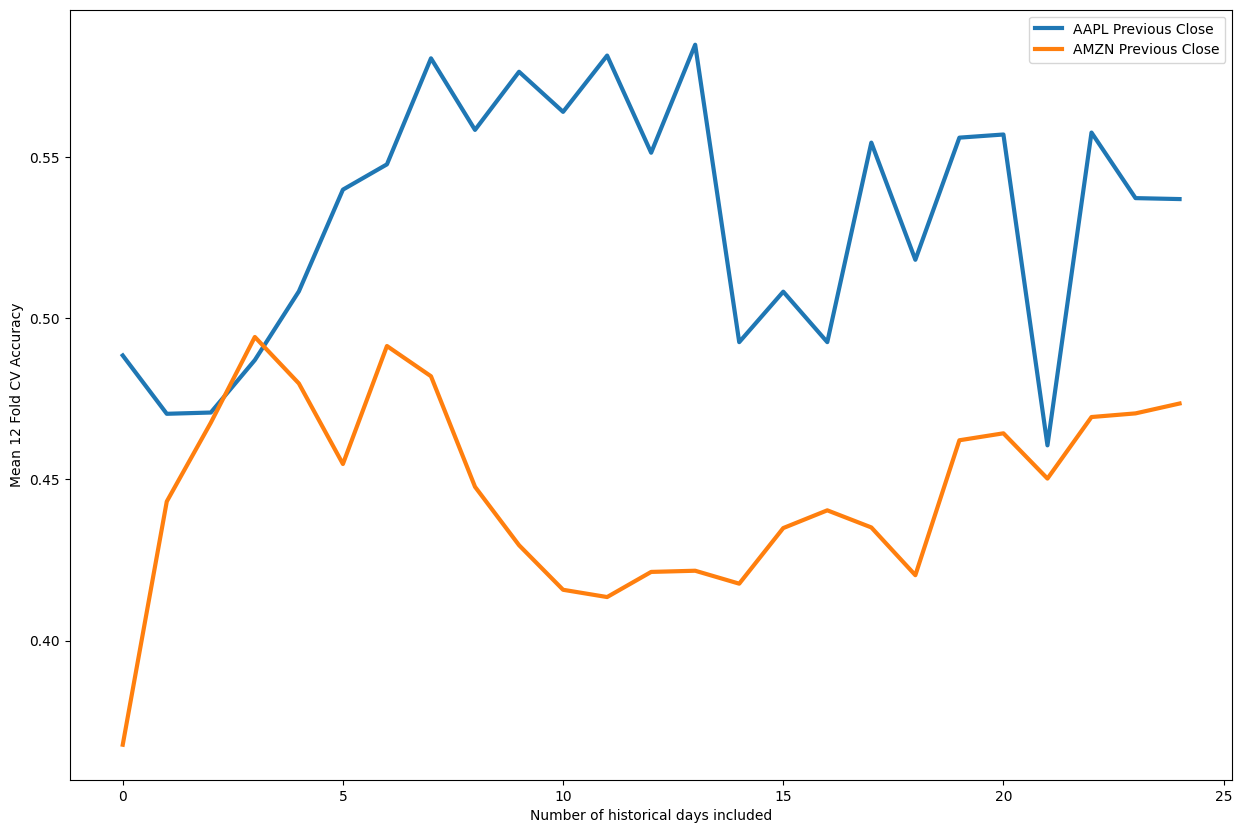

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
_ = ax.plot(aapl_prevClose_accuracies, label='AAPL Previous Close', linewidth=3)
_ = ax.plot(amzn_prevClose_accuracies, label='AMZN Previous Close', linewidth=3)
_ = ax.legend()
_ = ax.set_ylabel('Mean 12 Fold CV Accuracy')
_ = ax.set_xlabel('Number of historical days included')

In [9]:
feat = [
    'title_posSent',
    'title_neg_sent',
    'title_net_sent',
    'text_pos_sent',
    'text_neg_sent',
    'text_net_sent',
    'entity_pos_sent',
    'entity_neg_sent',
    'entity_net_sent',
    'prevClose_1',
    'prevClose_2',
    'prevClose_3',
    'prevClose_4',
    'prevClose_5',
    'prevClose_6',
    'prevClose_7',
    'prevClose_8',
    'prevClose_9',
    'prevClose_10',
    'prevClose_11',
    'prevClose_12',
    'prevClose_13',
    'prevClose_14',
    'prevClose_15',
    'prevClose_16',
    'prevClose_17',
    'prevClose_18',
    'prevClose_19',
    'prevClose_20',
    'prevClose_21',
    'prevClose_22',
    'prevClose_23',
    'prevClose_24',
    'prevClose_25']
label = 'direction'

In [10]:
def print_dataframe(filtered_cv_results):
    for mean_accuracy, std_accuracy, mean_precision, std_precision, mean_recall, std_recall, mean_f1, std_f1, params in zip(
        filtered_cv_results["mean_test_accuracy"],
        filtered_cv_results["std_test_accuracy"],
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["mean_test_f1"],
        filtered_cv_results["std_test_f1"],
        filtered_cv_results["params"],
    ):
        print(
            f"accuracy: {mean_accuracy:0.3f} (±{std_accuracy:0.03f}),"
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f"recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" f1: {mean_f1:0.3f} (±{std_f1:0.03f}),"
            f" for {params}"
        )
    print()

In [11]:
def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a accuracy threshold
    of 0.98, rank the remaining by f1 and keep all models with one standard
    deviation of the best by f1. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    accuracy_threshold = 0.6

    cv_results_ = pd.DataFrame(cv_results)
#     print("All grid-search results:")
#     print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_accuracy_cv_results = cv_results_[
        cv_results_["mean_test_accuracy"] > accuracy_threshold
    ]
    high_accuracy_cv_results.dropna(subset=['mean_test_accuracy']) 

#     print(f"Models with a accuracy higher than {accuracy_threshold}:")
#     print_dataframe(high_accuracy_cv_results)

    high_accuracy_cv_results = high_accuracy_cv_results[
        [
            "mean_score_time",
            "mean_test_f1",
            "std_test_f1",
            "mean_test_precision",
            "std_test_precision",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_accuracy",
            "std_test_accuracy",
            "rank_test_f1",
            "rank_test_precision",
            "rank_test_recall",
            "rank_test_accuracy",
            "params",
        ]
    ]

    # Select the most performant models in terms of f1
    # (within 1 sigma from the best)
    best_f1_std = high_accuracy_cv_results["mean_test_f1"].std()
    best_f1 = high_accuracy_cv_results["mean_test_f1"].max()
    best_f1_threshold = best_f1 - best_f1_std

    high_f1_cv_results = high_accuracy_cv_results[
        high_accuracy_cv_results["mean_test_f1"] > best_f1_threshold
    ]
    print(
        "Out of the previously selected high accuracy models, we keep all the\n"
        "the models within one standard deviation of the highest f1 model:"
    )
    print(high_f1_cv_results.shape)
    print_dataframe(high_f1_cv_results)

    # From the best candidates, select the highest accuracy model to predict
    top_f1_high_accuracy_index = high_f1_cv_results[
        "mean_test_accuracy"
    ].idxmax()


    return top_f1_high_accuracy_index

In [12]:
def tune_svm_hyperparams(df, feat, label, cv=3):
    estimators = [('scaler', StandardScaler()), ('clf', SVC())]
#     estimators = [('scaler', StandardScaler()), ('reduce_dim', KernelPCA()), ('clf', SVC())]
    scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

    pipe = Pipeline(steps=estimators)
    param_grid = [
        {
#             'reduce_dim__kernel': ('linear', 'poly', 'rbf'),
#             'reduce_dim__n_components': (5, 10),
            'clf__C': (0.001, 0.01),
            'clf__gamma': (1, 0.1),
            'clf__degree': (3, 5, 10),
            'clf__kernel': ('linear', 'poly', 'rbf')
        },
    ]

    grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=cv, refit='accuracy', scoring=scoring, verbose=0, n_jobs=2, return_train_score=True)

    print(df[feat].shape)
    print(df[label].shape)
    grid_search.fit(df[feat], df[label])
    
    # results = pd.DataFrame(cross_validate(grid_search, df[feat], df[label], cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1']))
    
    print(grid_search.best_params_)
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return {
        'grid_search': grid_search,
        'best_params': grid_search.best_params_,
        'results': grid_search.cv_results_
    }
    
#     results.describe()

In [13]:
print('Apple tuned svm')
aapl_tuned_svm = tune_svm_hyperparams(aapl, feat, 'direction', aapl_cv)
aapl_tuned_svm['results']

print('Amazon tuned svm')
amzn_tuned_svm = tune_svm_hyperparams(amzn, feat, 'direction', amzn_cv)
amzn_tuned_svm['results']


Apple tuned svm
(69622, 34)
(69622,)


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'clf__C': 0.001, 'clf__degree': 10, 'clf__gamma': 0.1, 'clf__kernel': 'poly'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=0.001, degree=10, gamma=0.1, kernel='poly'))])
0.557706958169793


{'mean_fit_time': array([ 448.09646153, 1216.96114914, 1644.13589977,  209.01523007,
         358.10268331,  101.1482281 ,   85.12751393, 1947.41650101,
         655.15589428,   85.56159519,   91.03045127,  355.79867703,
        1526.26083832, 4094.58238627,  120.48147558,  245.01479673,
        1025.03569957,  119.04298083,  101.00063764,  667.94848865,
         177.50075428,   86.86321801,   87.83278069,  151.81926778,
          98.19480058,  697.38309269,  130.65574581,   98.69550605,
         143.17844071,  111.37409279,   96.90316372, 3312.92842649,
         153.93296051,   85.28853655,  399.84891974,   98.03134797]),
 'std_fit_time': array([ 672.98925701, 1603.79444683,  703.30767916,  318.45438847,
         418.08318997,    6.56106463,    9.97681522, 2691.21369382,
         808.60563048,   10.24374608,    9.3834072 ,  546.74305508,
         581.79475781, 3633.20920798,   44.36728121,  570.61312965,
        1451.30447934,    9.50880622,    7.96485488,  127.96598515,
         234.

Amazon tuned svm
(19079, 34)
(19079,)


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined a

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and 

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined a

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defi

{'clf__C': 0.01, 'clf__degree': 5, 'clf__gamma': 1, 'clf__kernel': 'poly'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=0.01, degree=5, gamma=1, kernel='poly'))])
0.5412046386943937


{'mean_fit_time': array([  6.24607596,  24.66303396,   6.98230273,  80.46711499,
        137.25143681, 135.38352613,   6.26131105,  69.26755436,
          8.07343985,   7.19452472,   8.43552108,   8.2800732 ,
          7.38785768, 265.53141944,   8.50809113,   7.43662872,
         36.71485731,   6.9849841 ,   6.23114694, 105.73324232,
          6.91916035,   6.09136292,   6.49840023,  70.75015491,
         45.97235746,  64.24636911,   6.93037229,   6.22006296,
         11.08485834,   6.87661419,   6.23620593, 482.44411826,
          7.60110213,   6.88095404,  61.01048735,   8.13188133]),
 'std_fit_time': array([3.92709641e-01, 2.51374257e+00, 4.07036629e-01, 2.29169851e+02,
        3.34588716e+02, 3.27971837e+02, 3.50860748e-01, 1.66719359e+01,
        4.78205286e-01, 4.00776217e-01, 5.73836420e-01, 6.70186660e-01,
        5.30710809e-01, 5.28993599e+01, 4.62740837e-01, 4.64245004e-01,
        6.97246359e+00, 4.07005930e-01, 3.42884289e-01, 1.88113760e+01,
        4.09842938e-01, 3.631

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(aapl[feat + ['author']], aapl['direction'], test_size=0.5, random_state=None, shuffle=False)

author = X_test['author']
X_train = X_train.drop('author', axis=1)
# clf.fit(X_train, y_train)

pred = aapl_tuned_svm['grid_search'].predict(X_test.drop('author', axis=1))

res = pd.DataFrame({
    'author': author,
    'true_label': y_test,
    'pred_label': pred
})
res['correct_pred'] = res['true_label'] == res['pred_label']

accuracy_score(pred, y_test)
res

0.8082215391686536

,author,true_label,pred_label,correct_pred
34811,ABMN Staff,1,-1,False
34812,JF Staff,1,-1,False
34813,NaN,1,-1,False
34814,admin,1,-1,False
34815,sfgate.com,1,-1,False
...,...,...,...,...
69617,Motley Fool,-1,-1,True
69618,Jussi Askola,-1,1,False
69619,Marguerite Chambers,-1,-1,True
69620,Darrin Black,-1,-1,True


In [15]:
def author_stats(df):
    res = {
        'proportion_correct': df['correct_pred'].sum() / df.shape[0],
        'total_correct': df['correct_pred'].sum(),
        'total_articles': df.shape[0],
        'correctXtotal': df['correct_pred'].sum() * df.shape[0]
    }
    return pd.Series(res, index=['proportion_correct', 'total_correct', 'total_articles', 'correctXtotal'])

best_sources = (res.groupby('author')
    .apply(author_stats)
    .reset_index()
    .sort_values(['proportion_correct', 'total_articles'], ascending=False)
    # .sort_values(['correctXtotal'], ascending=False)
    # .sort_values(['total_articles', 'total_correct'], ascending=False)
)

best_sources.head(25)

,author,proportion_correct,total_correct,total_articles,correctXtotal
2149,Tomi Kilgore,1.0,92.0,92.0,8464.0
725,Edoardo Maggio,1.0,31.0,31.0,961.0
2380,kopitiambot.com,1.0,29.0,29.0,841.0
719,EdJenner,1.0,21.0,21.0,441.0
1646,Paige Leskin,1.0,18.0,18.0,324.0
2035,Swarup Gupta,1.0,18.0,18.0,324.0
328,Berkeley Lovelace Jr.,1.0,15.0,15.0,225.0
2368,investopedia.com,1.0,15.0,15.0,225.0
2487,theglobeandmail.com,1.0,15.0,15.0,225.0
1514,Miroslav Marinoff,1.0,14.0,14.0,196.0


In [16]:
best_sources[
    (best_sources['proportion_correct'] >= 0.75)
].sort_values('total_articles', ascending=False)

,author,proportion_correct,total_correct,total_articles,correctXtotal
2397,morningstar.com,0.834045,1759.0,2109.0,3709731.0
2301,admin,0.832293,1067.0,1282.0,1367894.0
2516,zacks.com,0.776923,303.0,390.0,118170.0
2490,thestreet.com,0.863388,316.0,366.0,115656.0
1480,Michael Collier,0.895765,275.0,307.0,84425.0
...,...,...,...,...,...
1101,Joe Fahmy,1.000000,1.0,1.0,1.0
1100,Joe Dahlke,1.000000,1.0,1.0,1.0
1098,Joe Albano,1.000000,1.0,1.0,1.0
1094,Joanna Stern,1.000000,1.0,1.0,1.0
